<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Проверка-на-пропуски-в-данных" data-toc-modified-id="Проверка-на-пропуски-в-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка на пропуски в данных</a></span></li><li><span><a href="#Проверка-на-наличие-дубликатов-в-данных" data-toc-modified-id="Проверка-на-наличие-дубликатов-в-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверка на наличие дубликатов в данных</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Без-преобразования" data-toc-modified-id="Без-преобразования-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Без преобразования</a></span></li><li><span><a href="#Преобразование-данных" data-toc-modified-id="Преобразование-данных-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Преобразование данных</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Обзор данных

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

In [3]:
df.sample(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
674,1,43.0,40800.0,1,1
1741,1,28.0,21100.0,0,0
4652,1,22.0,45000.0,2,0
4449,1,34.0,28400.0,0,0
1379,1,23.0,50100.0,1,0
3781,0,32.0,42100.0,0,0
2084,0,29.0,34800.0,0,0
3516,1,43.0,38300.0,1,1
4696,1,38.0,46800.0,0,0
4713,0,31.0,33500.0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


### Проверка на пропуски в данных

In [6]:
df.isna().mean()

Пол                  0.0
Возраст              0.0
Зарплата             0.0
Члены семьи          0.0
Страховые выплаты    0.0
dtype: float64

### Проверка на наличие дубликатов в данных

In [7]:
df.duplicated().sum()

153

In [8]:
df = df.drop_duplicates()

### EDA

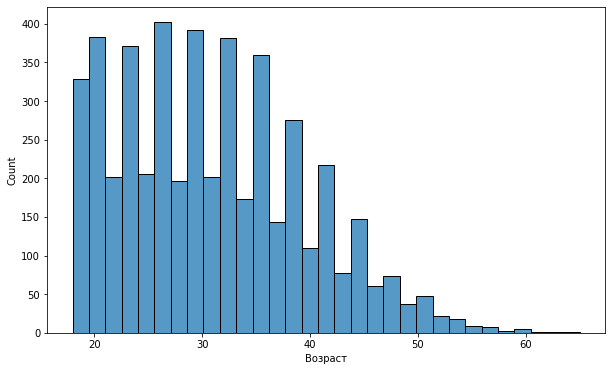

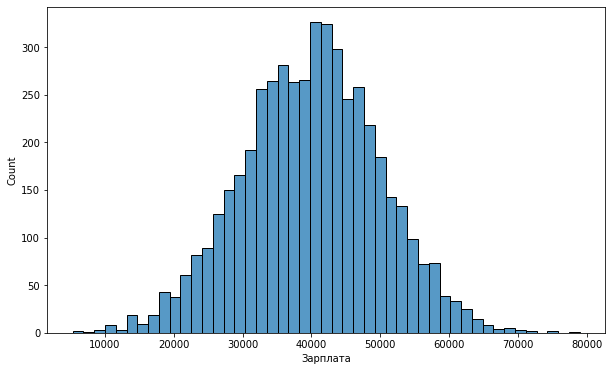

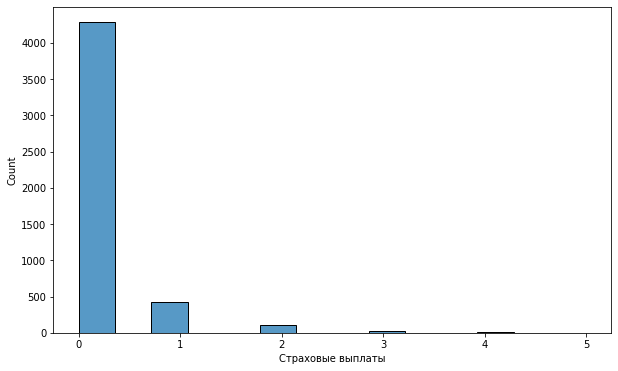

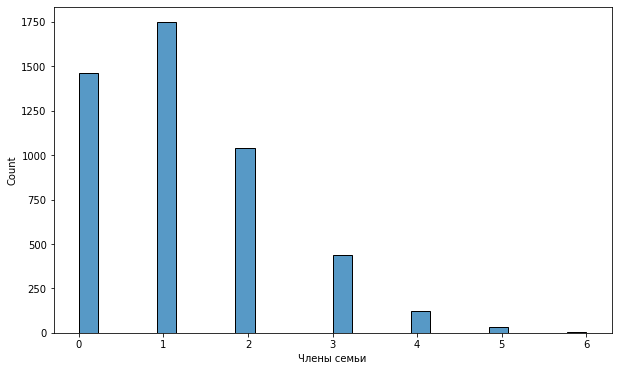

In [9]:
columns = ['Возраст', 'Зарплата', 'Страховые выплаты', 'Члены семьи']
for col in columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df[col])
    plt.show()

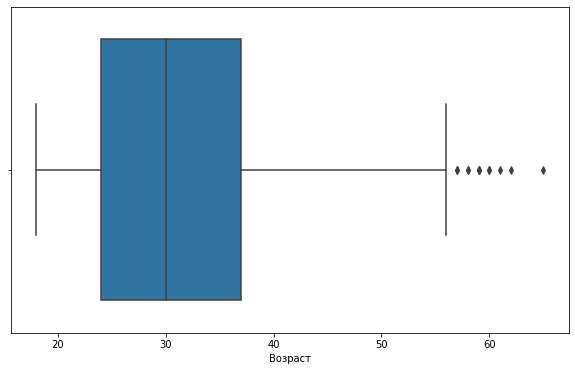

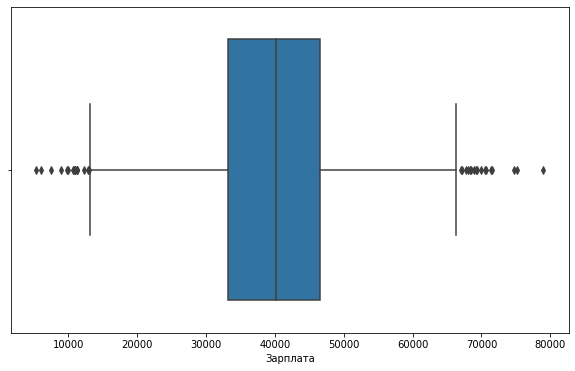

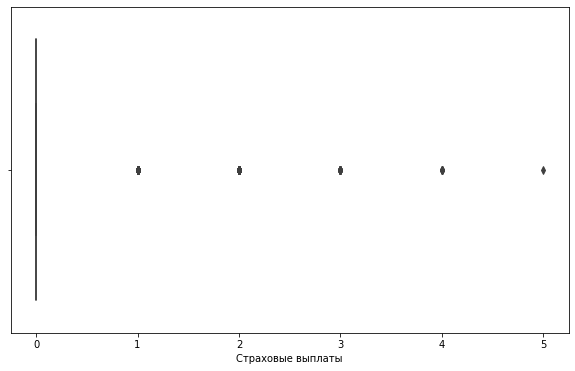

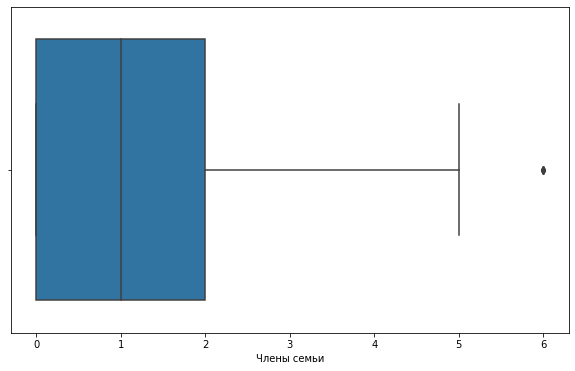

In [10]:
columns = ['Возраст', 'Зарплата', 'Страховые выплаты', 'Члены семьи']
for col in columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df[col])
    plt.show()

В данных есть выбросы. Значимые нарушения не выявлены.

### Вывод:

Данные загружены и не имеют аномалий.<br>
Пропусков в данных нет. <br>
В данных было найдено и удалено 153 дубликата.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

x**Ответ:**  $R^2$ не изменится.<br>

Заменим матрицу $X$ на матрицу $Z$:

$$
Z = XP \qquad (2.1)
$$

где $P$ - обратимая матрица с некими значениями, на которую может быть умножена матрица $X$. 

**Обоснование:** <br>

Заменим $X$ на $Z$ и вычислим, чему будет равено предсказание и вектор весов.

$$
a_1 = Zw_1 \qquad (2.2)
$$
$$
w_1 = (Z^T Z)^{-1} Z^T y \qquad (2.3)
$$

Подставим уравнение 2.2 правую часть уравнения 2.3 и получим следущее:

$$
a_1 = Z (Z^T Z)^{-1} Z^T y \qquad (2.4)
$$

Заменим все $Z$ правой частью уравнения 2.1:

$$
a_1 = XP ((XP)^T (XP))^{-1} (XP)^T y \qquad (2.5)
$$

Для следующего шага понадобится следующее свойсво обратной матрицы:

$$
(AB)^{-1} = B^{-1} A^{-1}
$$

Раскроем $((XP)^T (XP))^{-1}$ в два шага:

$$
a_1 = XP ((XP)^T (XP))^{-1} (XP)^T y = XP(XP)^{-1}((XP)^T)^{-1} (XP)^T y = XPP^{-1}X^{-1}((XP)^T)^{-1} (XP)^T y  \qquad (2.6)
$$

Умножение приведет к $PP^{-1} = E$. Для следуюзего этапа воспользуемся свойством транспорнированной матрицы:

$$
(AB)^T = B^T A^T
$$

Умножение на единичную матрицу ничего не меняет. Раскроем $((XP)^T)^{-1} (XP)^T$ в три шага:

$$
a_1 = XEX^{-1}((XP)^T)^{-1} (XP)^T y = XX^{-1}(P^T X^T)^{-1} P^T X^T y = XX^{-1} (X^T)^{-1} (P^T)^{-1}  P^T X^T y   \qquad (2.7)
$$

Умножение приведет к $(P^T)^{-1}  P^T = E$. Посмотрим, что осталось от уравнения 2.7:

$$
a_1 = XX^{-1} (X^T)^{-1} E X^T y = X(X^T X)^{-1} X^T y = Xw = a  \qquad (2.8)
$$

Как видно, значение предсказания $a$ не меняется, если умножать матрицу признаков на обратимую матрицу.

$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
.....|
$$

По свойству обратной матрицы: при умножение матрицы на обратную ей получается единичная матрица $E$

$$
E = (P^T)^{-1}P^T
$$

$$
w' = (X^T X)^{-1} (EP)^{-1} X^T y
$$

При умножении любой матрицы на единичную матрицу получается таже самая матрица, тогда:

$$
w' = (X^T X)^{-1} P^{-1} X^T y
$$

Тода $w'$ можно представить $w'= P^{-1}w$, где $w = (X^T X)^{-1} X^T y $

$$
A = Z (P^{-1}w) 
$$
$$
A = XP (P^{-1}w) 
$$
По свойству обратной матрицы и еденичной матрицы сокращаем $P$ и $P^{-1}$

$$
A = Xw
$$

$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
.......
$$

$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} E X^T y 
$$
$$
w' = P^{-1} (X^T X)^{-1} X^T y 
$$
$$
w = (X^T X)^{-1} X^T y 
$$
$$
w' = P^{-1} w
$$
$$
A = Z (P^{-1}w) 
$$
$$
A = XP (P^{-1}w)
$$
$$
A = Xw
$$

## Алгоритм преобразования

**Алгоритм**

Для защиты информации на этапе поиска коэффициентов регрессии и предсказаний регрессии будем умножать матрицу $Y$ признаков на обратимую матрицу, сгенерированную случайным образом.

Этапы алгоритма:
1. Составление матрицы $Y$.
2. Проверка матрицы на обратимость. Вычисление детерминанта матрицы $Y$.
3. Получение матрицы преобразованных признаков $Z = XY$.
4. Применение алгоритма на преобразованных признаках $Z$.

**Обоснование**

Матрица $Y$ должна иметь необходимую размерность $(nxn)$, где n - количество признаков для регрессии.
Таким образом матрица $Z$ будет иметь туже размерность, что и матрица $X$. Обратная матрица $Y$ существует только для квадратных невырожденных матриц (определитель которых не равен нулю).

Пример:

$
X = \begin{pmatrix}
1 & 2 \\
2 & 3 \\
4 & 5  
\end{pmatrix}
\qquad 
Y = \begin{pmatrix}
1 & 0 \\
2 & 3 \\  
\end{pmatrix}
\qquad det  Y = 3 $

Найдем значние Z:

$
Z = \begin{pmatrix}
1 & 2 \\
2 & 3 \\
4 & 5  
\end{pmatrix} \begin{pmatrix}
1 & 0 \\
2 & 3 \\  
\end{pmatrix} = \begin{pmatrix}
1*1+2*2 & 1*0+2*3  \\
2*1+3*2 & 2*0+3*3  \\
4*1+5*2 & 4*0+5*3   
\end{pmatrix} = \begin{pmatrix}
5 & 6 \\
8 & 9 \\
14 & 15  
\end{pmatrix}$

После этого добавляем нулевой столбец и вводим данные в линейную регрессию.

## Проверка алгоритма

### Без преобразования

In [11]:
X = df.drop("Страховые выплаты", axis=1)
y = df["Страховые выплаты"]

X.shape, y.shape

((4847, 4), (4847,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   train_size=.8,
                                                   random_state=42)

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
scaller = StandardScaler()

In [16]:
pipeline = Pipeline([("standard_scaller", scaller),("linear_regression", lr)])

In [17]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standard_scaller', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [18]:
R2 = r2_score(y_test, pipeline.predict(X_test))
print("R2 =", R2)

R2 = 0.43926641677497846


### Преобразование данных

Создадим функцию преобразования матрицы признаков.

In [19]:
def cipher_features(features):
    crypted_features = features
    n = features.shape[1]
    np.random.seed(7072020)
    cipher_matrix = np.random.randint(1, 10, (n,n))
    det = np.linalg.det(cipher_matrix)
    while det == 0:
        np.random.seed(12345)
        cipher_matrix = np.random.randint(1, 10, (n,n))
        det = np.linalg.det(cipher_matrix)
    crypted_features = crypted_features @ cipher_matrix
    return crypted_features, cipher_matrix

In [20]:
display(X.head())
X_new, cipher_matrix = cipher_features(X)
X_new.columns = X.columns
display(X_new.head())

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


,Пол,Возраст,Зарплата,Члены семьи
0,397184.0,49981.0,99373.0,248097.0
1,304422.0,38421.0,76185.0,190101.0
2,168261.0,21261.0,42116.0,105058.0
3,333805.0,41903.0,83486.0,208560.0
4,209059.0,26357.0,52320.0,130562.0


После преобразования, данные хранятся в зашифрованном виде. <br>Разобьем данные на тренировочную и обучающую выборку и проверим $R2$ значение.

In [21]:
X_train_new, X_test_new = train_test_split(X_new,
                                           train_size=.8,
                                           random_state=42)

In [22]:
pipeline_new = Pipeline([("standard_scaller", scaller),("linear_regression", lr)])

In [23]:
pipeline.fit(X_train_new, y_train)

Pipeline(steps=[('standard_scaller', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [24]:
R2_new = r2_score(y_test, pipeline.predict(X_test_new))
print("R2_new =", R2)

R2_new = 0.43926641677497846


In [25]:
print(f'Линейная регрессия: {R2}')
print(f'Линейная регрессия на преобразованных признаках: {R2_new}')

Линейная регрессия: 0.43926641677497846
Линейная регрессия на преобразованных признаках: 0.43926641677499323


## Вывод

1. Загружены и изучены данные.
2. Качество линейной регресии не изменилось от использования исодной матрици и исходной матрицы, умноженную на обратимую.
3. Создан алгоритм преобразования данных.
4. Исследован алгоритм преобразования данных и проверена метрика R2 для данных без преобразования и с ним.

По результатам работы использования матричных операций можно увидеть, что данные очень просто зашифровать от распознования, имея правильную матрицу.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования